# **Manejo de DataSet de Melbourne**

# Obtención de datos

In [391]:
import pathlib


path=str(pathlib.Path().resolve())+"\\"

## **WINDOWS**

#Subir el json (descargarlo a local de kaggle con “general nueva api”, subirlo con files.upload y pasarlo a la carpeta .kaggle

!pip install -q kaggle


!mkdir %USERPROFILE%/.kaggle
!copy path\\kaggle.json %USERPROFILE%\\.kaggle
#!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


#Trae el dataset de kaggle
!kaggle datasets download "anthonypino/melbourne-housing-market"
name_zip = "melbourne-housing-market" + ".zip"
!tar -xf "melbourne-housing-market.zip"


# Copiarlo al drive
!del path + "MELBOURNE_HOUSE_PRICES_LESS.csv"
!del path + "melbourne-housing-market.zip"
#!copy path+'Melbourne_housing_FULL.csv' path+'Files\\Melbourne_housing_FULL.csv'
#!del path + "Melbourne_housing_FULL.csv"


## **LINUX**

!pip install -q kaggle


!mkdir %USER%/.kaggle
!cp path\\kaggle.json %USER%\\.kaggle
#!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle datasets download "anthonypino/melbourne-housing-market"
name_zip = "melbourne-housing-market" + ".zip"
!tar -xf "melbourne-housing-market.zip"


# Copiarlo al drive
!rm path + "MELBOURNE_HOUSE_PRICES_LESS.csv"
!rm path + "melbourne-housing-market.zip"

In [392]:
import pandas as pd

df = pd.read_csv(path+"Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [393]:
df=df[df['Type']=='h']

df.loc[df[x] == 'N','age']==40

# Lectura de datos y análisis

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23980 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23980 non-null  object 
 1   Address        23980 non-null  object 
 2   Rooms          23980 non-null  int64  
 3   Type           23980 non-null  object 
 4   Price          18472 non-null  float64
 5   Method         23980 non-null  object 
 6   SellerG        23980 non-null  object 
 7   Date           23980 non-null  object 
 8   Distance       23979 non-null  float64
 9   Postcode       23979 non-null  float64
 10  Bedroom2       20422 non-null  float64
 11  Bathroom       20416 non-null  float64
 12  Car            19932 non-null  float64
 13  Landsize       17694 non-null  float64
 14  BuildingArea   10413 non-null  float64
 15  YearBuilt      11453 non-null  float64
 16  CouncilArea    23978 non-null  object 
 17  Lattitude      20540 non-null  float64
 18  Longtitude 

In [395]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0


In [396]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,23980.000000,1.847200e+04,23979.000000,23979.000000,20422.000000,20416.000000,19932.000000,17694.000000,10413.000000,11453.000000,20540.000000,20540.000000,23978.000000
mean,3.357298,1.203718e+06,12.174207,3118.747904,3.336794,1.692986,1.866697,644.703176,178.201163,1957.841439,-37.806238,145.002355,7393.864251
std,0.862126,6.879395e+05,7.129130,122.220974,0.893352,0.748306,1.072525,3793.194794,452.976890,38.033303,0.095357,0.130441,4385.094769
min,1.000000,1.310000e+05,0.700000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,3.000000,7.460000e+05,7.400000,3047.000000,3.000000,1.000000,1.000000,361.000000,116.000000,1930.000000,-37.861338,144.926000,4181.000000
50%,3.000000,1.015000e+06,11.200000,3101.000000,3.000000,2.000000,2.000000,579.000000,150.000000,1960.000000,-37.799400,145.011245,6482.000000
75%,4.000000,1.450000e+06,14.700000,3150.000000,4.000000,2.000000,2.000000,693.000000,204.000000,1990.000000,-37.746200,145.081500,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [397]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1288347529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'],dayfirst=True)


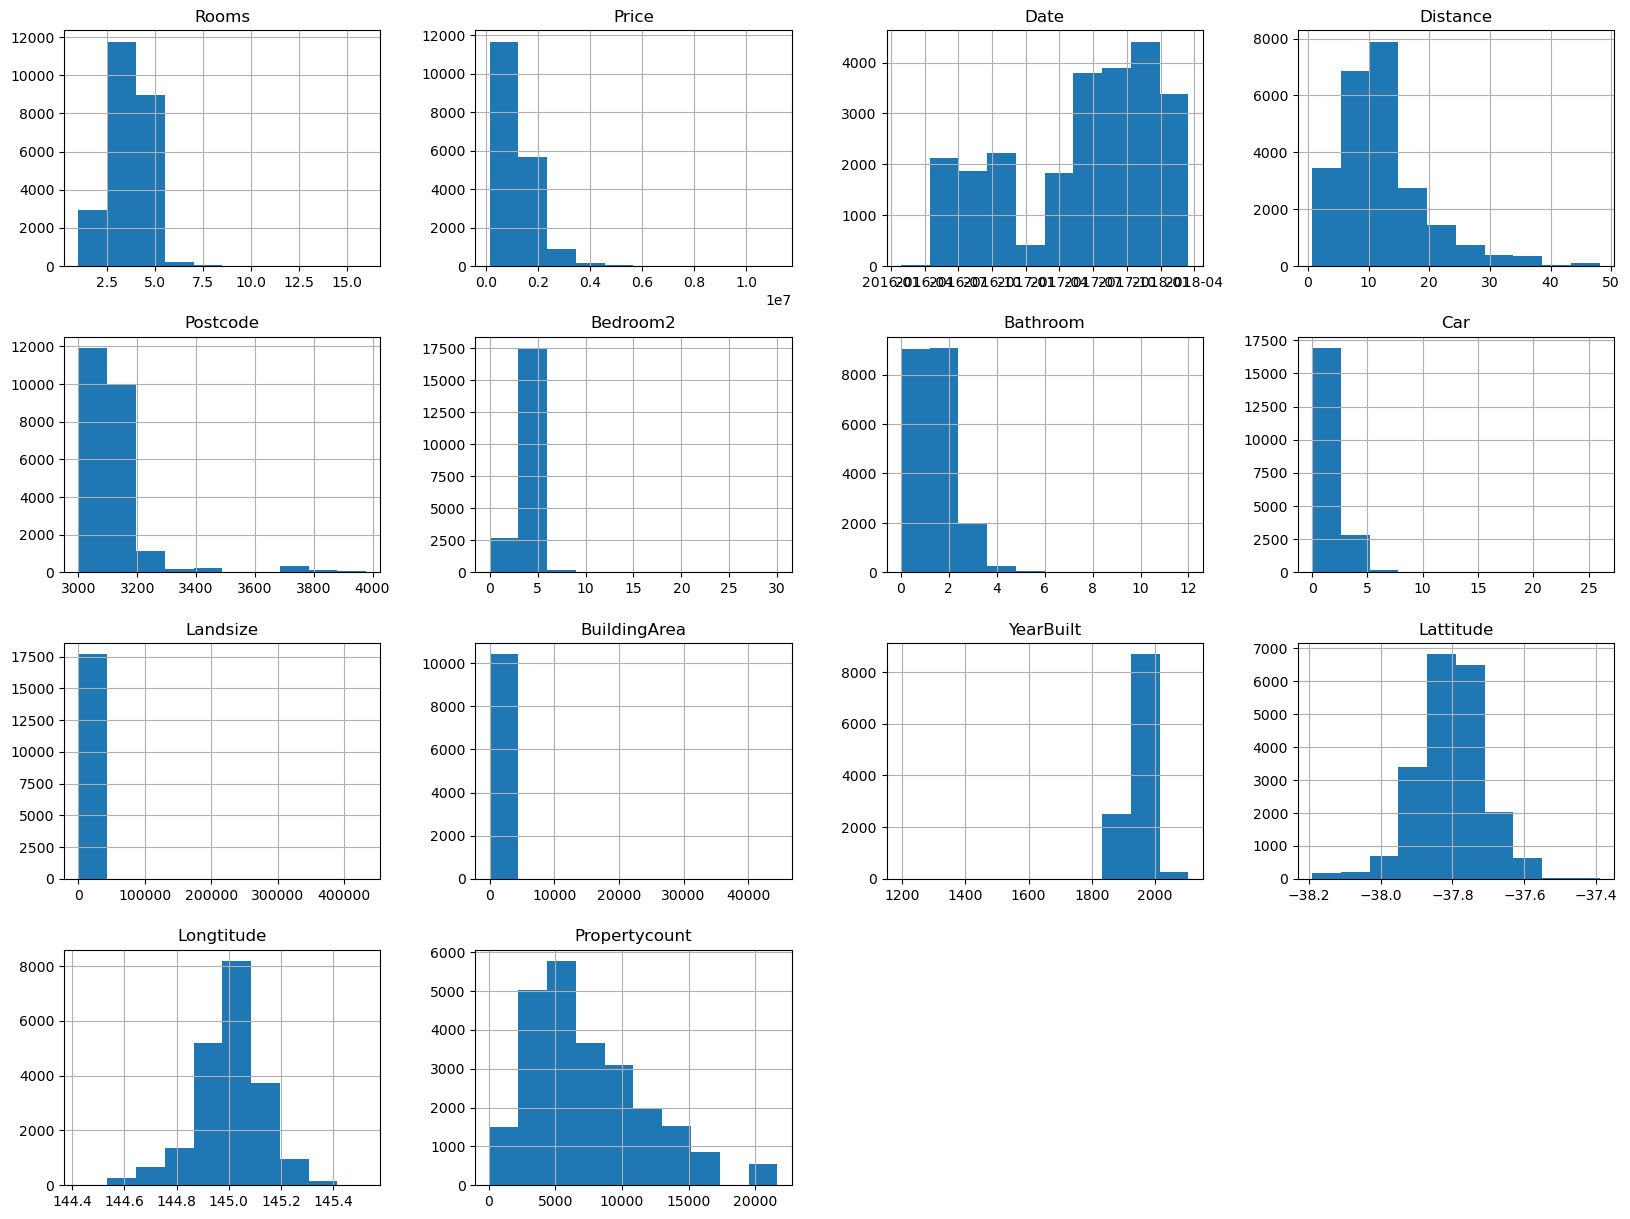

In [398]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20,15));
plt.show();

Vemos que hay Euliers En Landsize, BuildingArea,Bedroom2... y en YearBuilt por abajo por lo que tendremos que limpiar Euliers

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

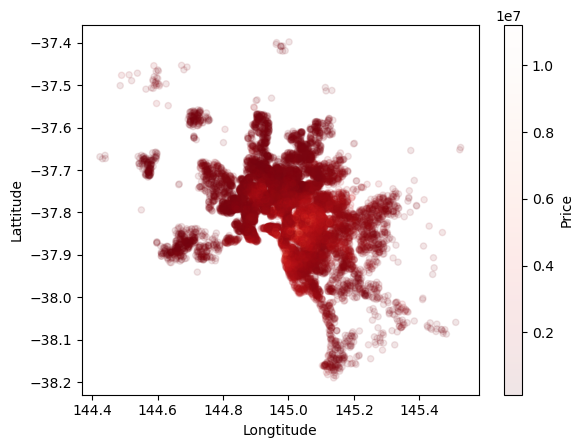

In [399]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude",c='Price',alpha=0.1,colormap="Reds_r")

Vemos que hay una gran cantidad de casas sobre el 144.6 y 145.4 en Longitud y en Latitud desde -38.2 y -37.5

In [400]:
df.sort_values(by='Date',axis=0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2866,Canterbury,140 Canterbury Rd,4,h,NaN,SP,Fletchers,2016-01-28,9.0,3126.0,...,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.82350,145.07510,Southern Metropolitan,3265.0
10128,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,S,Fletchers,2016-01-28,11.2,3127.0,...,1.0,2.0,490.0,NaN,NaN,Boroondara City Council,-37.83610,145.10060,Southern Metropolitan,5457.0
9676,Strathmore,24 Balmoral Av,4,h,1500000.0,SP,Rendina,2016-02-04,9.7,3041.0,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3284.0
683,Ashwood,4 Mitchell Av,3,h,NaN,SP,Buxton,2016-02-04,12.2,3147.0,...,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,2894.0
602,Ashburton,7A Wirraway Ct,3,h,NaN,S,Buxton,2016-02-04,11.0,3147.0,...,1.0,1.0,370.0,100.0,1950.0,Boroondara City Council,-37.86750,145.08950,Southern Metropolitan,3052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33574,Mount Waverley,40 Sunhill Rd,3,h,1400000.0,PI,Barry,2018-03-17,14.2,3149.0,...,1.0,2.0,724.0,139.0,1960.0,Monash City Council,-37.86824,145.12800,Eastern Metropolitan,13366.0
33573,Mount Waverley,27 Solomon St,3,h,1000000.0,S,McGrath/First,2018-03-17,14.2,3149.0,...,1.0,2.0,660.0,150.0,1968.0,Monash City Council,-37.88811,145.11153,Eastern Metropolitan,13366.0
33572,Mount Waverley,11 Mummery St,4,h,1705000.0,S,Biggin,2018-03-17,14.2,3149.0,...,2.0,2.0,806.0,NaN,NaN,Monash City Council,-37.87923,145.12935,Eastern Metropolitan,13366.0
33583,Newport,53 Agg St,3,h,NaN,PI,Village,2018-03-17,6.2,3015.0,...,1.0,1.0,338.0,105.0,1940.0,Hobsons Bay City Council,-37.84343,144.87567,Western Metropolitan,5498.0


No nos dice mucho poniendo fechas tan amplias

<Axes: xlabel='Date'>

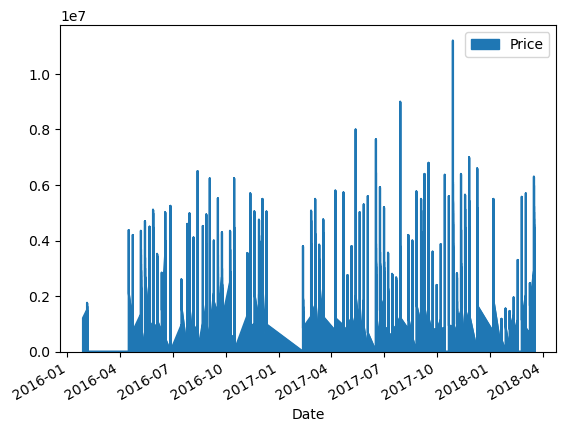

In [401]:
df.plot.area('Date','Price')

In [402]:
group = df.groupby('Date')
group=group[['Price','Rooms']]

media = group.mean()
sum = group.sum()

media.reset_index(inplace=True)
sum.reset_index(inplace=True)

<Axes: xlabel='Date'>

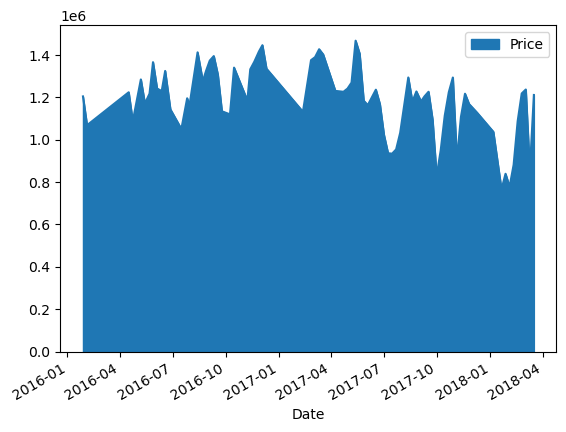

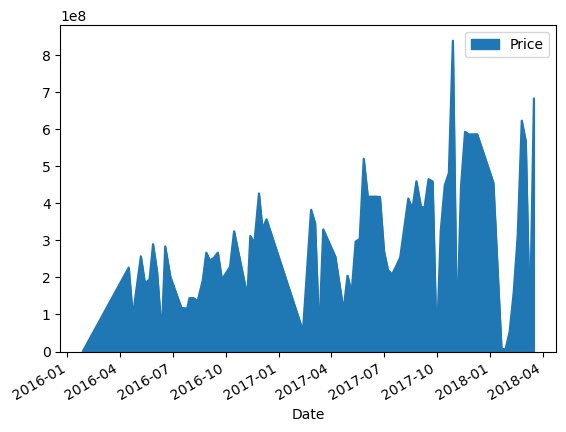

In [403]:
media.plot.area('Date','Price')
sum.plot.area('Date','Price')

Vemos que la media del precio bajó de forma agrupada al largo del tiempo, pero el total subió por lo que el precio total subió por que aumentó la cantidad a medida que aumentaba el tiempo, pero a menor demanda, menor es el precio por lo que bajó individualmente

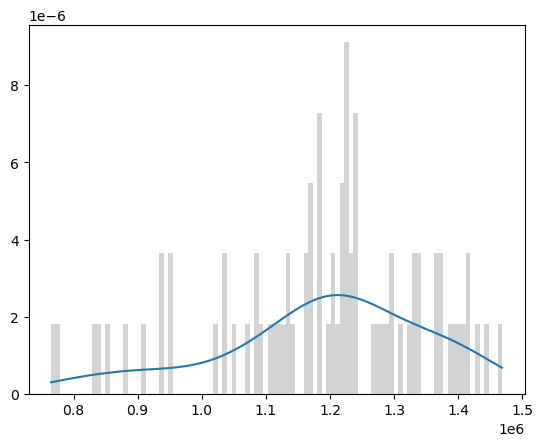

In [404]:
import scipy.stats as stats

grade = media['Price']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)
plt.plot(x, density(x))

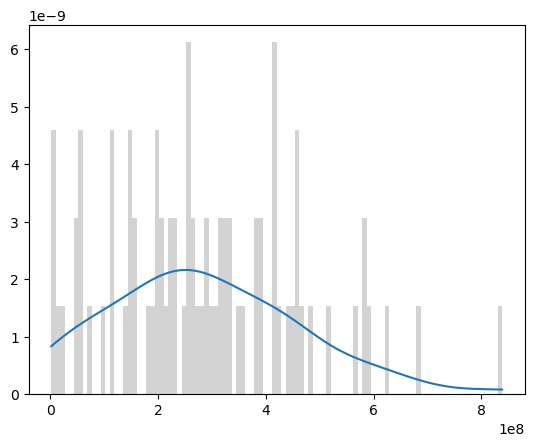

In [405]:
import scipy.stats as stats

grade = sum['Price']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)
plt.plot(x, density(x))

In [406]:
#from Clases.Matplot.BoxPlot import BoxPlot
#
floats = df.select_dtypes(include=['float64'])
#BoxPlot.box_plot(floats.columns,num_xticks=10,by='Price',dataFrame=floats,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")

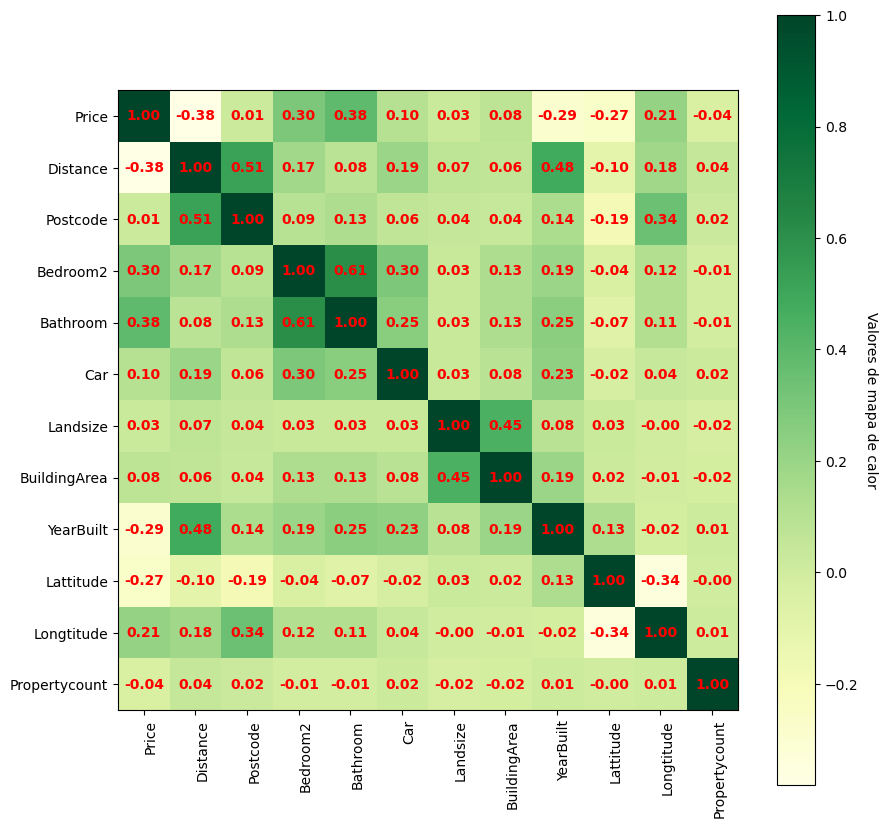

In [407]:
from Clases.Matplot.HeatMap import HeatMap

corr=floats.corr()
HeatMap.heat_map(corr,corr.columns,corr.columns,corr.columns,corr.columns,cmap="YlGn",figsize=(10,10),weight="bold",textColor="red")

<Axes: >

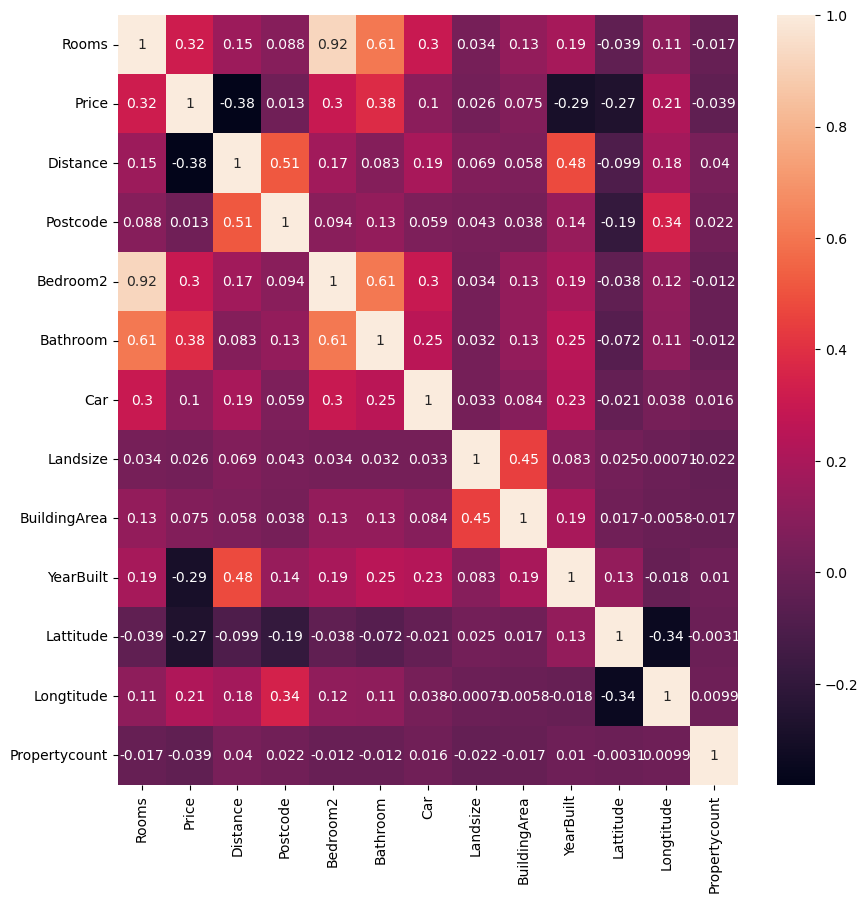

In [408]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23980 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23980 non-null  object        
 1   Address        23980 non-null  object        
 2   Rooms          23980 non-null  int64         
 3   Type           23980 non-null  object        
 4   Price          18472 non-null  float64       
 5   Method         23980 non-null  object        
 6   SellerG        23980 non-null  object        
 7   Date           23980 non-null  datetime64[ns]
 8   Distance       23979 non-null  float64       
 9   Postcode       23979 non-null  float64       
 10  Bedroom2       20422 non-null  float64       
 11  Bathroom       20416 non-null  float64       
 12  Car            19932 non-null  float64       
 13  Landsize       17694 non-null  float64       
 14  BuildingArea   10413 non-null  float64       
 15  YearBuilt      11453 non

# Limpieza de datos

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23980 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23980 non-null  object        
 1   Address        23980 non-null  object        
 2   Rooms          23980 non-null  int64         
 3   Type           23980 non-null  object        
 4   Price          18472 non-null  float64       
 5   Method         23980 non-null  object        
 6   SellerG        23980 non-null  object        
 7   Date           23980 non-null  datetime64[ns]
 8   Distance       23979 non-null  float64       
 9   Postcode       23979 non-null  float64       
 10  Bedroom2       20422 non-null  float64       
 11  Bathroom       20416 non-null  float64       
 12  Car            19932 non-null  float64       
 13  Landsize       17694 non-null  float64       
 14  BuildingArea   10413 non-null  float64       
 15  YearBuilt      11453 non

In [411]:
df_object = df.select_dtypes(include=['object'])

# Borramos dos filas que tienen muchos nulos
df = df[df_object.isnull().sum(axis=1) < 2]

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23978 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23978 non-null  object        
 1   Address        23978 non-null  object        
 2   Rooms          23978 non-null  int64         
 3   Type           23978 non-null  object        
 4   Price          18470 non-null  float64       
 5   Method         23978 non-null  object        
 6   SellerG        23978 non-null  object        
 7   Date           23978 non-null  datetime64[ns]
 8   Distance       23978 non-null  float64       
 9   Postcode       23978 non-null  float64       
 10  Bedroom2       20422 non-null  float64       
 11  Bathroom       20416 non-null  float64       
 12  Car            19932 non-null  float64       
 13  Landsize       17694 non-null  float64       
 14  BuildingArea   10413 non-null  float64       
 15  YearBuilt      11453 non

In [413]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23978 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23978 non-null  object        
 1   Address        23978 non-null  object        
 2   Rooms          23978 non-null  int64         
 3   Type           23978 non-null  object        
 4   Price          18470 non-null  float64       
 5   Method         23978 non-null  object        
 6   SellerG        23978 non-null  object        
 7   Date           23978 non-null  datetime64[ns]
 8   Distance       23978 non-null  float64       
 9   Postcode       23978 non-null  float64       
 10  Bedroom2       20422 non-null  float64       
 11  Bathroom       20416 non-null  float64       
 12  Car            19932 non-null  float64       
 13  Landsize       17694 non-null  float64       
 14  BuildingArea   10413 non-null  float64       
 15  YearBuilt      11453 non

In [415]:
df=df.drop(["Postcode","Propertycount","SellerG","Address"],axis=1)

In [416]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64','int64']]
cat_cols = [col for col in df.columns if df[col].dtype not in ['float64','int64']]

In [417]:
df

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,NaN,SS,2016-09-03,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,2016-12-03,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,2016-02-04,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,2017-03-04,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan
5,Abbotsford,3,h,850000.0,PI,2017-03-04,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,3,h,1101000.0,S,2018-02-24,6.3,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan
34852,Yarraville,4,h,1480000.0,PI,2018-02-24,6.3,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan
34853,Yarraville,2,h,888000.0,SP,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan
34855,Yarraville,3,h,1140000.0,SP,2018-02-24,6.3,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan


In [418]:
#import pandas as pd
#import numpy as np
#
#def remove_outliers(columns,df):
#    for j in columns:
#        q1 = df[j].quantile(0.175)
#        q3 = df[j].quantile(0.825)
#        iqr = q3-q1
#        Lower_tail = q1 - 1.5 * iqr
#        Upper_tail = q3 + 1.5 * iqr
#        med = np.median(df[j])
#        for i in df[j]:
#            if i > Upper_tail or i < Lower_tail:
#                    df[j] = df[j].replace(i, med)
#    return df
#
#df = remove_outliers(num_cols,df)
#df

In [419]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
df[encoded_cols] = encoder.transform(df[cat_cols])

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1359427039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[encoded_cols] = encoder.transform(df[cat_cols])
C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1359427039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1359427039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[encoded_cols] = encoder.transform(df[cat_cols])
C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1359427039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[encoded_cols] = encoder.transform(df[cat_cols])
C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_9488\1359427039.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [420]:
df=df.drop(cat_cols,axis=1)

In [421]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,6.3,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34855,3,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [422]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train, x_test = train_test_split(df, test_size = 0.2)

In [423]:
from sklearn.impute import SimpleImputer

num_cols_train = [col for col in x_train.columns if df[col].dtype in ['float64','int64']]
num_cols_test = [col for col in x_test.columns if df[col].dtype in ['float64','int64']]

ls = df.select_dtypes(include=['int64']).columns
model=SimpleImputer().fit(x_train[num_cols_train])
x_train[num_cols_train] = model.transform(x_train[num_cols_train])
x_test[num_cols_test] = model.transform(x_test[num_cols_test])
a=[]
ls=[ls]+['Car','Bathroom','Bedroom2']
for i in ls:
    x_train[i]=x_train[i].round().astype('int64')
    x_test[i]=x_test[i].round().astype('int64')

In [424]:
y_train = x_train["Price"].copy()
x_train = x_train.drop(["Price"],axis=1)

y_test = x_test["Price"].copy()
x_test = x_test.drop(["Price"],axis=1)


In [425]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **Definición de los modelos**

In [426]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, SGDRegressor,LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor


models = {
    #'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    #'LinearRegression':LinearRegression(),
    #'RandomForestRegressor':RandomForestRegressor()
}

In [427]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

model_results=[]
model_names=[]
model_cross_score=[]
model_cross_media=[]
model_cross_std=[]
for name,model in models.items():
    a = model.fit(x_train,y_train)
    predicted = a.predict(x_test)
    score = r2_score(y_test, predicted)
    model_results.append(score)
    model_names.append(name)
    model_score = cross_val_score(model, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-model_score)
    model_cross_score.append(root_lin_score)
    model_cross_media.append(root_lin_score.mean())
    model_cross_std.append(root_lin_score.std())
    
    
    df_results = pd.DataFrame([model_names,model_results,model_cross_score,model_cross_media,model_cross_std,[mean_squared_error(y_test, predicted,squared=False)]])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'SCORE',2:'RSCORE',3:'RMEDIA',4:'RDESVIACION',5:"SQUARE ERROR"}).sort_values(by='SQUARE ERROR',ascending=False)

In [428]:
df_results

,Model,SCORE,RSCORE,RMEDIA,RDESVIACION,SQUARE ERROR
0,XGBRegressor,0.536458,"[398811.03424461203, 422403.6978412205, 422168...",408308.520707,13610.368364,426944.794479


In [429]:
import xgboost as xgb
import optuna

def objective(trial):

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    model = xgb.XGBRegressor(**param)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

study.best_params

[I 2024-02-19 21:53:33,883] A new study created in memory with name: no-name-6a52ff73-aaa4-4e38-99b1-6efe1750ed7d
[I 2024-02-19 21:54:37,680] Trial 0 finished with value: 220762356101.0086 and parameters: {'max_depth': 8, 'learning_rate': 0.5426683532758124, 'n_estimators': 867, 'min_child_weight': 2, 'gamma': 0.2874929507902621, 'subsample': 0.9784140942132729, 'colsample_bytree': 0.9736757807131238, 'reg_alpha': 0.7260510711136766, 'reg_lambda': 0.2490744811551184, 'random_state': 311}. Best is trial 0 with value: 220762356101.0086.
[I 2024-02-19 21:54:39,472] Trial 1 finished with value: 202066097326.9057 and parameters: {'max_depth': 2, 'learning_rate': 0.2309836915878723, 'n_estimators': 182, 'min_child_weight': 6, 'gamma': 0.26987227415698783, 'subsample': 0.13988288206809973, 'colsample_bytree': 0.28599048899406543, 'reg_alpha': 0.1729201460756376, 'reg_lambda': 0.6364044869330587, 'random_state': 308}. Best is trial 0 with value: 220762356101.0086.
[I 2024-02-19 21:54:43,083] T

{'max_depth': 5,
 'learning_rate': 0.9134876805326477,
 'n_estimators': 810,
 'min_child_weight': 6,
 'gamma': 0.5509762816867272,
 'subsample': 0.1363510127285074,
 'colsample_bytree': 0.9914709248487953,
 'reg_alpha': 0.35998022396602813,
 'reg_lambda': 0.22642145569542638,
 'random_state': 924}

In [430]:
best_params = study.best_params
#best_params = {'lambda': 3.559040735218393,
 #'alpha': 0.25772549522868987,
 #'colsample_bytree': 0.6,
 #'subsample': 0.5,
 #'learning_rate': 0.014,
 #'n_estimators': 4000,
 #'max_depth': 11,
 #'random_state': 24,
 #'min_child_weight': 3}

In [431]:
XGBR = XGBRegressor(**best_params)
XGBR.fit(x_train, y_train)
predicted = XGBR.predict(x_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 1165503432239459.2


In [432]:
datos_prueba =  x_test[:20]
p = XGBR.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_test[:20]
print("Reales: ", list(y_reales))

PREDICCIONES:  [-5.0295740e+12 -5.0295729e+12  5.5954490e+13 -1.5577222e+12
 -5.0295687e+12 -5.0295729e+12 -5.0295740e+12 -5.0295719e+12
  5.5954490e+13 -5.0295729e+12  5.5794016e+13 -5.0921288e+12
 -5.0191805e+12 -5.0295740e+12 -5.1900501e+12 -7.5871536e+12
 -5.0295740e+12 -5.0295729e+12  5.5954784e+13 -5.0295729e+12]
Reales:  [1200460.5484721472, 1300000.0, 625000.0, 1337500.0, 700000.0, 1320000.0, 820000.0, 1899000.0, 518000.0, 1200460.5484721472, 1200460.5484721472, 662000.0, 1200460.5484721472, 486500.0, 1015000.0, 3201000.0, 1000000.0, 1200460.5484721472, 1200460.5484721472, 1715000.0]
